<a href="https://colab.research.google.com/github/JazmineOrtizMarin/Simulaci-n-2/blob/main/Mon_Hun_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Metropolis-Hastings**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

Implementamos el algoritmo de **Metropolis-Hastings**, un método de Monte Carlo via Cadenas de Markov (MCMC), para generar una muestra de una distribución de probabilidad bidimensional compleja. El objetivo es analizar y aproximar las propiedades de la siguiente función de densidad de probabilidad (PDF):

$$ f(\mathbf{x}) = c \cdot \exp\left(-\frac{x_1^2 x_2^2 + x_1^2 + x_2^2 - 8x_1 - 8x_2}{2}\right) $$

donde $\mathbf{x} = (x_1, x_2)$ y $c$ es una constante de normalización desconocida (o difícil de calcular). Una de las grandes ventajas de Metropolis-Hastings es que no necesitamos conocer el valor de $c$ para muestrear de la distribución.

In [ ]:
def pdf_objetivo(x):
    # Función de densidad de probabilidad objetivo.
    x1, x2 = x[0], x[1]
    exponente = -(x1**2 * x2**2 + x1**2 + x2**2 - 8*x1 - 8*x2) / 2
    return np.exp(exponente)

In [ ]:
# Algoritmo Metropolis-Hastings
def metropolis_hastings(funcion_objetivo, n_muestras=10000, descarte_inicial=1000, tamano_paso=0.5):

    # Empezamos en un punto aleatorio o fijo.
    posicion_actual = np.array([0.0, 0.0])
    muestras = []

    for i in range(n_muestras + descarte_inicial):
        posicion_propuesta = posicion_actual + np.random.normal(scale=tamano_paso, size=2)

        # Calculamos la razón de aceptación (alpha)
        p_propuesta = funcion_objetivo(posicion_propuesta)
        p_actual = funcion_objetivo(posicion_actual)
        ratio_aceptacion = p_propuesta / p_actual

        # Decidimos si aceptamos o rechazamos la propuesta
        if np.random.uniform(0, 1) < ratio_aceptacion:
            posicion_actual = posicion_propuesta

        # Guardamos la muestra después del período de "descarte inicial"
        if i >= descarte_inicial:
            muestras.append(posicion_actual)

    return np.array(muestras)

In [ ]:
muestras = metropolis_hastings(pdf_objetivo, n_muestras=20000, descarte_inicial=5000, tamano_paso=0.3)

# Encontramos el punto con la máxima densidad en nuestra muestra
idx_maxima_densidad = np.argmax(pdf_objetivo(muestras.T))
punto_maximo = muestras[idx_maxima_densidad]
print(f"Punto de máxima densidad encontrado en la muestra (aproximación): {punto_maximo}")
print(f"Valor de la función en ese punto: {pdf_objetivo(punto_maximo)}")

Punto de máxima densidad encontrado en la muestra (aproximación): [0.26983065 3.71483746]
Valor de la función en ese punto: 4914.177341777923


**b) Gráfica de la función objetivo**

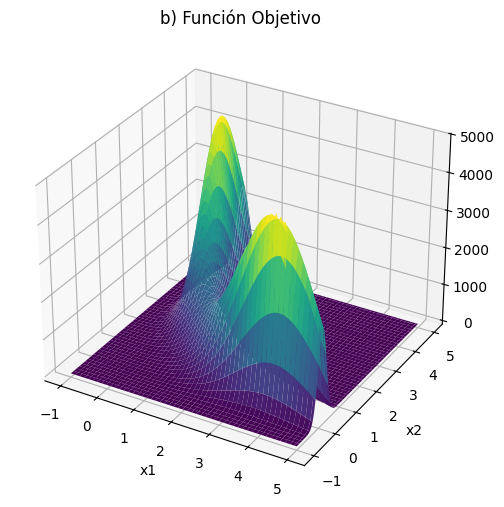

In [ ]:
fig = plt.figure(figsize=(8, 6)) # Ajustamos el tamaño para una sola gráfica
ax1 = fig.add_subplot(111, projection='3d')

x = np.linspace(-1, 5, 100)
y = np.linspace(-1, 5, 100)
X, Y = np.meshgrid(x, y)
Z = pdf_objetivo([X, Y])

ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax1.set_title("b) Función Objetivo")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")

plt.show()

**c) ¿Por qué funciona el algoritmo?**

El algoritmo funciona porque construye una **cadena de Markov**, que es una cadena de Markov es una secuencia de eventos aleatorios donde la probabilidad de cada evento futuro solo depende del estado actual.

En el método Metropolis-Hastings es que la regla de aceptación está diseñada para que, después de un número suficiente de pasos (el período de "calentamiento" o `descarte_inicial`), la distribución de los puntos en la cadena converja a la distribución objetivo $f(\mathbf{x})$. En otras palabras, la cadena "aprende" a pasar más tiempo en las regiones de alta probabilidad y menos tiempo en las de baja probabilidad, de una manera que imita perfectamente la forma de la función objetivo.

**e) Gráficas de las cadenas, histogramas, etc.**

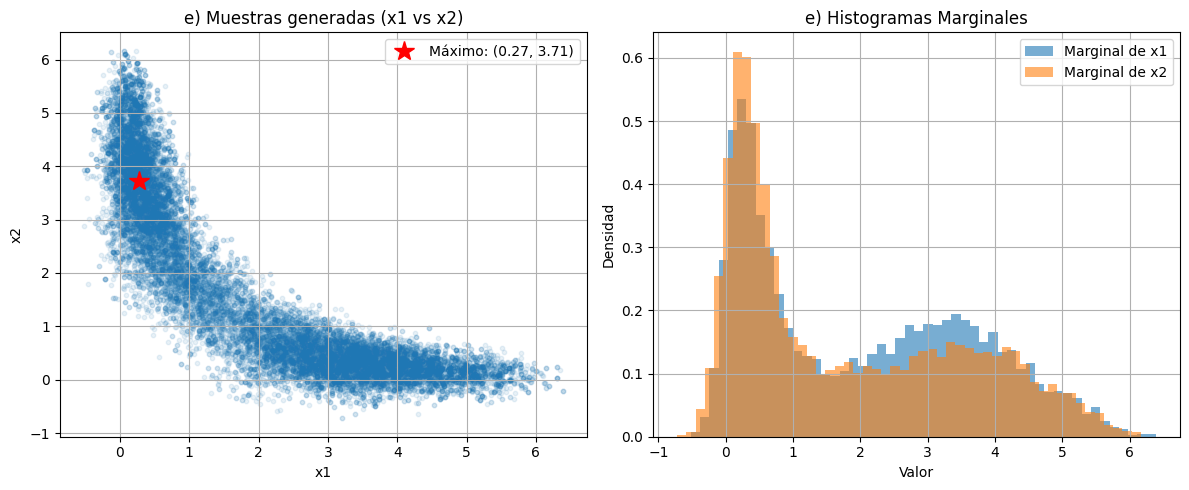

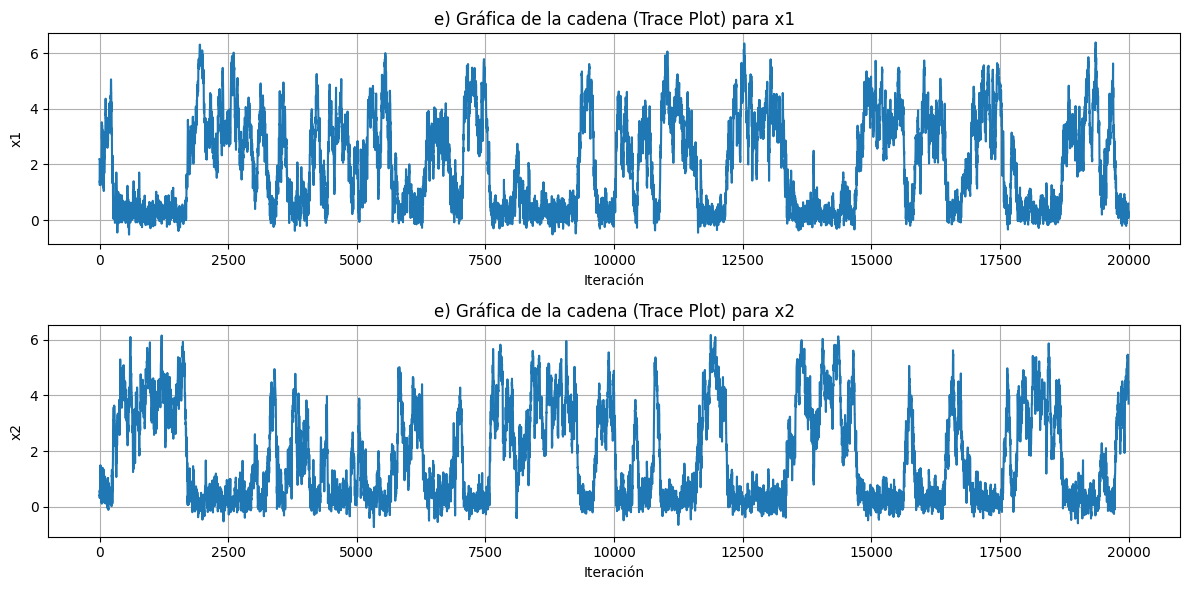

In [ ]:
# Gráfica de dispersión e histogramas
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(12, 5)) # Creamos una nueva figura con 2 subplots

# Gráfica de dispersión de las muestras
ax2.scatter(muestras[:, 0], muestras[:, 1], alpha=0.1, s=10)
ax2.set_title("e) Muestras generadas (x1 vs x2)")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.grid(True)
# Marcamos el máximo encontrado
ax2.plot(punto_maximo[0], punto_maximo[1], 'r*', markersize=15, label=f'Máximo: ({punto_maximo[0]:.2f}, {punto_maximo[1]:.2f})')
ax2.legend()

# Histogramas de las distribuciones marginales
ax3.hist(muestras[:, 0], bins=50, density=True, alpha=0.6, label='Marginal de x1')
ax3.hist(muestras[:, 1], bins=50, density=True, alpha=0.6, label='Marginal de x2')
ax3.set_title("e) Histogramas Marginales")
ax3.set_xlabel("Valor")
ax3.set_ylabel("Densidad")
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

# Gráficas de las cadenas (Trace plots)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(muestras[:, 0])
plt.title("e) Gráfica de la cadena (Trace Plot) para x1")
plt.xlabel("Iteración")
plt.ylabel("x1")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(muestras[:, 1])
plt.title("e) Gráfica de la cadena (Trace Plot) para x2")
plt.xlabel("Iteración")
plt.ylabel("x2")
plt.grid(True)

plt.tight_layout()
plt.show()

**d) Razón de Aceptación**

El núcleo del algoritmo es la decisión de aceptar o rechazar un nuevo punto "candidato" ($\mathbf{x}_{\text{propuesta}}$) a partir de un punto "actual" ($\mathbf{x}_{\text{actual}}$). Esto se hace calculando la **razón de aceptación**:

$$A = \min\left(1, \frac{f(\mathbf{x}_{\text{propuesta}})}{f(\mathbf{x}_{\text{actual}})}\right)$$

Se genera un número aleatorio $u$ entre 0 y 1. La decisión se toma así:
-   **Si $u < A$**: Se acepta el punto propuesto. El nuevo estado de la cadena es $\mathbf{x}_{\text{propuesta}}$.
-   **Si $u \ge A$**: Se rechaza el punto propuesto. La cadena no se mueve, y el siguiente estado es una copia del estado actual, $\mathbf{x}_{\text{actual}}$.

Este mecanismo tiene dos consecuencias importantes:
1.  **Movimiento hacia picos**: Si el punto propuesto tiene una probabilidad mayor que el actual ($f(\mathbf{x}_{\text{propuesta}}) > f(\mathbf{x}_{\text{actual}})$), la razón es mayor que 1, y el movimiento **siempre se acepta**. Esto asegura que la cadena explore y se mueva hacia las zonas de alta densidad (los picos de la función).
2.  **Exploración**: Si el punto propuesto tiene una probabilidad menor, la razón es menor que 1. Aún así, existe una probabilidad de aceptarlo. Esto es fundamental para que la cadena no se quede atascada en un máximo local y pueda explorar toda la distribución.

**f) Usar el Muestreo para Maximizar la Función**

Metropolis-Hastings es un algoritmo de **muestreo**, no un algoritmo de **optimización**, por lo tanto, su propósito principal es generar puntos de una distribución, no encontrar el punto más alto de esa distribución.

Sin embargo, podemos aprovechar la naturaleza de la muestra que genera. Como el algoritmo produce puntos con una densidad que imita a la función objetivo, las regiones con los valores más altos en la función (los picos) serán las más densamente pobladas por nuestras muestras.

Por lo tanto, una forma sencilla y efectiva de encontrar una excelente **aproximación del máximo** de la función es simplemente buscar en toda nuestra colección de `muestras` y encontrar cuál de ellas produce el valor más alto al ser evaluada en la `pdf_objetivo`.

En la práctica, esto se logra evaluando la función objetivo para cada punto en nuestro arreglo de muestras y encontrando el índice del valor máximo.

In [ ]:
# Evaluamos la PDF objetivo para cada una de las muestras generadas.
valores_pdf = pdf_objetivo(muestras.T)

# Buscamos el índice (la posición) del valor más alto en la lista de resultados.
idx_maxima_densidad = np.argmax(valores_pdf)

# Usamos ese índice para obtener las coordenadas (x1, x2) del punto máximo de nuestra muestra.
punto_maximo = muestras[idx_maxima_densidad]
valor_maximo_encontrado = valores_pdf[idx_maxima_densidad]

# Imprimimos los resultados.
print(f"Total de muestras analizadas: {len(muestras)}")
print(f"El punto que maximiza la función es (aprox.): {punto_maximo}")
print(f"El valor de la función en ese punto es: {valor_maximo_encontrado}")

Total de muestras analizadas: 20000
El punto que maximiza la función es (aprox.): [0.26983065 3.71483746]
El valor de la función en ese punto es: 4914.177341777923
